INF 2190 Assignment 2 Group 33

Income Rates, Career Satisfaction, and Career Choice Factors Among University Students

In [ ]:
# Import the 'drive' module from the 'google.colab' package to enable Google Drive integration.
# Then, mount Google Drive to the '/drive' directory within the Colab environment.
# The 'force_remount=True' parameter ensures that the Drive is remounted even if it was previously mounted.

from google.colab import drive
drive.flush_and_unmount()  # Unmount the drive
drive.mount('/drive', force_remount=True)

# Change the current working directory to the specified folder within Google Drive,
# where you can save and load your Colab notebooks or files.

#%cd '/drive/MyDrive/UofT/UT MI 2024 F/2190 Data Analytics Group 33'
%cd '/drive/MyDrive/School/University/Masters/Year 1/Semester 1/INF2190H - Periklis Andritsos/Course Project'

Mounted at /drive
/drive/MyDrive/School/University/Masters/Year 1/Semester 1/INF2190H - Periklis Andritsos/Course Project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

salary_df = pd.read_csv('Salary.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Part 1: Data Cleaning**

In [ ]:
# Step 1: Check for missing values
print(salary_df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 2: Check for duplicate rows
print(salary_df.duplicated().sum())

1536


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove duplicates
salary_df = salary_df.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 3: Check data types
print(salary_df.dtypes)

Age                    float64
Gender                  object
Education Level          int64
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
Senior                   int64
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# convert object type to category
salary_df['Gender'] = salary_df['Gender'].astype('category')
salary_df['Job Title'] = salary_df['Job Title'].astype('category')
salary_df['Country'] = salary_df['Country'].astype('category')
salary_df['Race'] = salary_df['Race'].astype('category')
salary_df['Senior'] = salary_df['Senior'].astype('category')

# Map numerical values to corresponding education level names
education_mapping = {
    0: "High School",
    1: "Bachelor Degree",
    2: "Master Degree",
    3: "PhD"
}

# Replace the numerical values with names
salary_df['Education Level'] = salary_df['Education Level'].replace(education_mapping)

# Verify the changes
print(salary_df['Education Level'].value_counts())


Education Level
Bachelor Degree    2254
Master Degree      1481
PhD                1077
High School         336
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(salary_df.describe())

               Age  Years of Experience         Salary
count  5148.000000          5148.000000    5148.000000
mean     34.001166             8.336636  114272.010878
std       7.762879             6.233548   52458.684724
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  113448.500000
75%      39.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 1: Identify Outliers (Numerical) using IQR (Interquartile Range) method

def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Find outliers in 'Age' and 'Years of Experience'
outliers_age = find_outliers(salary_df, 'Age')
outliers_exp = find_outliers(salary_df, 'Years of Experience')
outliers_sal = find_outliers(salary_df, 'Salary')

# Print outliers to understand them
print(f"Outliers in Age:\n{outliers_age.head()}")
print(f"Outliers in Years of Experience:\n{outliers_exp.head()}")
print(f"Outliers in Salary:\n{outliers_sal.head()}")

Outliers in Age:
       Age Gender Education Level                  Job Title  \
1209  61.0   Male             PhD  Software Engineer Manager   
1221  57.0   Male             PhD  Software Engineer Manager   
1223  62.0   Male             PhD  Software Engineer Manager   
1234  62.0   Male             PhD  Software Engineer Manager   
1244  56.0   Male             PhD  Software Engineer Manager   

      Years of Experience    Salary Country    Race Senior  
1209                 20.0  200000.0      UK   Welsh      0  
1221                 18.0  195000.0   China   White      0  
1223                 19.0  200000.0      UK   White      0  
1234                 20.0  200000.0   China  Korean      0  
1244                 17.0  195000.0   China   White      0  
Outliers in Years of Experience:
       Age  Gender Education Level                  Job Title  \
2382  57.0  Female             PhD        Full Stack Engineer   
2387  52.0  Female   Master Degree          Software Engineer   
2391

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 2: Remove Outliers (Numerical) from the DataFrame

# Remove outliers by excluding rows identified as outliers in 'Age', 'Years of Experience', and 'Salary'
salary_df_cleaned = salary_df[
    ~salary_df.index.isin(outliers_age.index) &
    ~salary_df.index.isin(outliers_exp.index) &
    ~salary_df.index.isin(outliers_sal.index)
]

# Display the cleaned data
print(salary_df_cleaned.describe())

               Age  Years of Experience         Salary
count  5057.000000          5057.000000    5057.000000
mean     33.617955             8.015424  112903.344078
std       7.271681             5.759328   51894.322793
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   65000.000000
50%      32.000000             7.000000  110000.000000
75%      38.000000            12.000000  160000.000000
max      55.000000            25.000000  250000.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Final check salary_df_cleaned
print(salary_df_cleaned.info())

print(salary_df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5057 entries, 0 to 6682
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5057 non-null   float64 
 1   Gender               5057 non-null   category
 2   Education Level      5057 non-null   object  
 3   Job Title            5057 non-null   category
 4   Years of Experience  5057 non-null   float64 
 5   Salary               5057 non-null   float64 
 6   Country              5057 non-null   category
 7   Race                 5057 non-null   category
 8   Senior               5057 non-null   category
dtypes: category(5), float64(3), object(1)
memory usage: 233.1+ KB
None
    Age  Gender  Education Level          Job Title  Years of Experience  \
0  32.0    Male  Bachelor Degree  Software Engineer                  5.0   
1  28.0  Female    Master Degree       Data Analyst                  3.0   
2  45.0    Male              PhD      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Part 2: Data Analysis**


**2.1 Descriptive Statistics:**

**2.1.1 Salary Distribution Box Plot**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


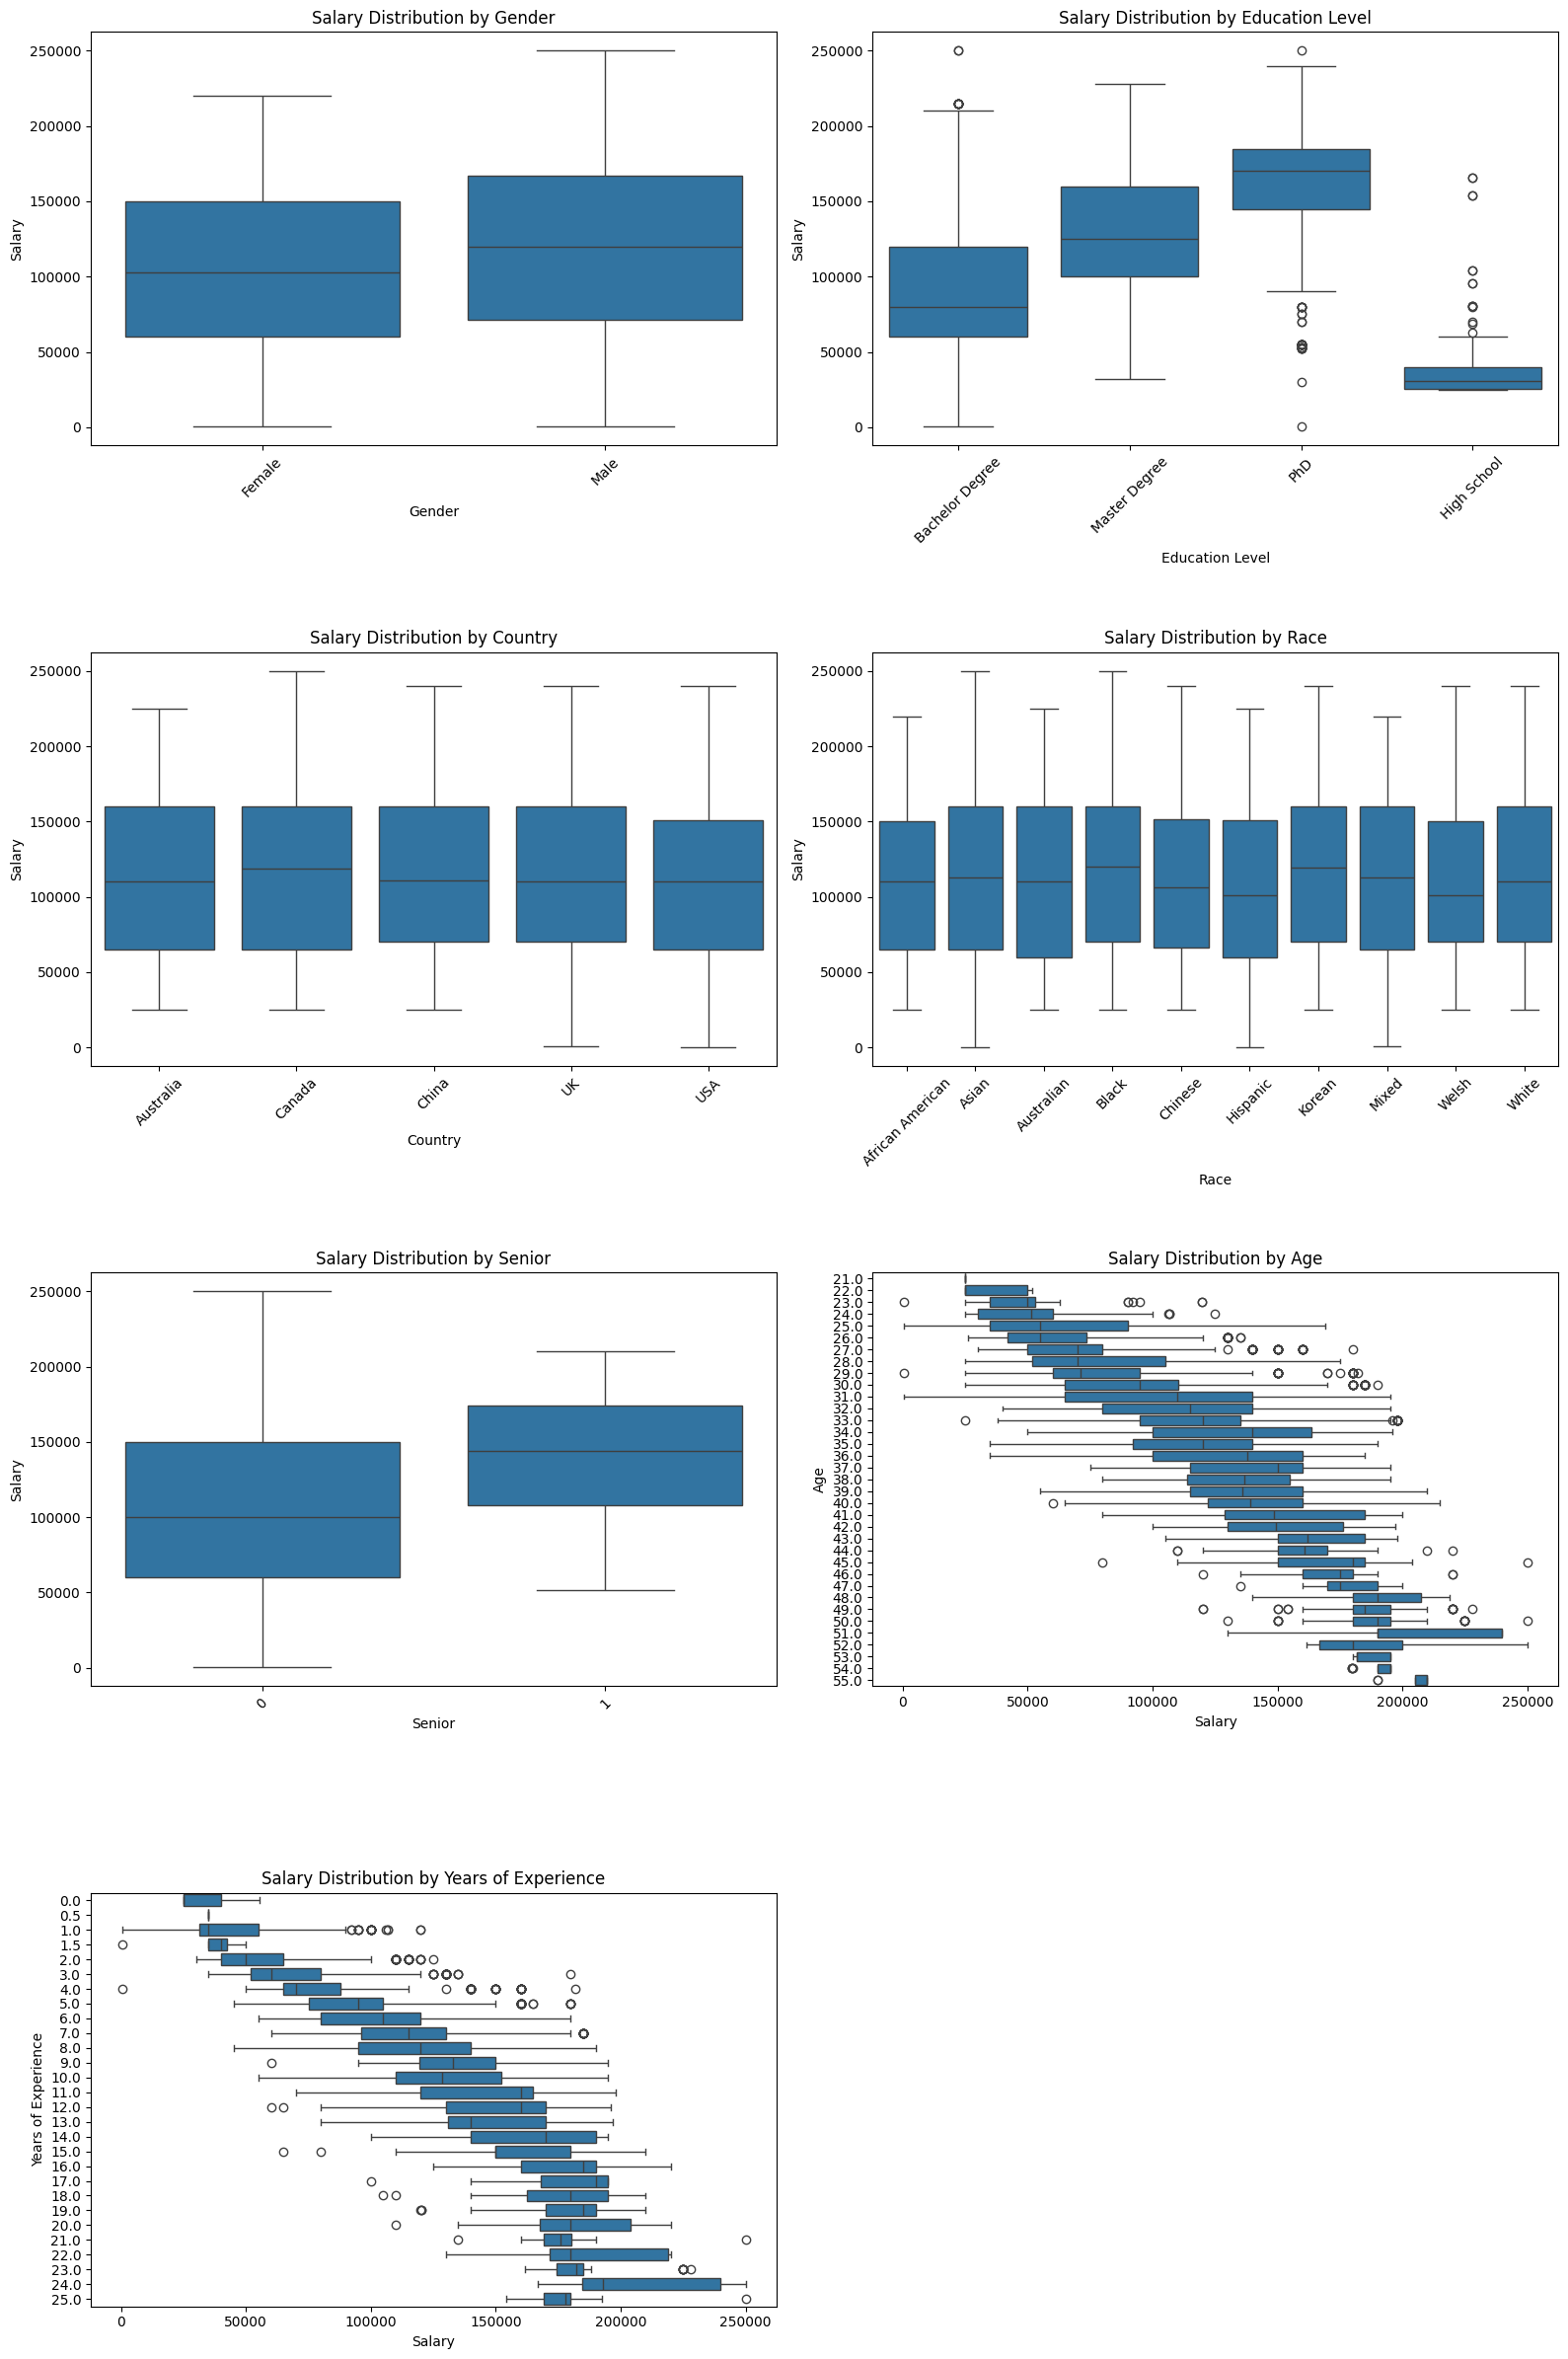

In [ ]:
# List of variables to plot
categorical_vars = ['Gender', 'Education Level', 'Country', 'Race', 'Senior']
numerical_vars = ['Age', 'Years of Experience']

# Combine both categorical and numerical variables for plotting
all_vars = categorical_vars + numerical_vars

# Number of plots
num_vars = len(all_vars)

# Determine the number of rows and columns (2 graphs per row)
rows = (num_vars + 1) // 2  # Calculate number of rows needed
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 6))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Generate box plots for each variable
for i, var in enumerate(all_vars):
    if var in categorical_vars:
        sns.boxplot(x=var, y='Salary', data=salary_df_cleaned, ax=axes[i])
    else:  # For numerical variables
        sns.boxplot(y=var, x='Salary', data=salary_df_cleaned, ax=axes[i], orient='h')
    axes[i].set_title(f'Salary Distribution by {var}')
    if var in categorical_vars:
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Adjust vertical space between rows
plt.show()


From the salary distribution box plots, we can notice that "Age", "Education Level", and "Years of Experience" have the biggest influence on employees' salary rates. Next we will build correlation matrix to invest the degree of correlation between these variables and target variable salary.

**2.1.2 Top 5 salary job titles for each educational level.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-46-f0bfd39df8b0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_job_title_education = salary_df_cleaned.groupby(['Education Level', 'Job Title'])['Salary'].mean()


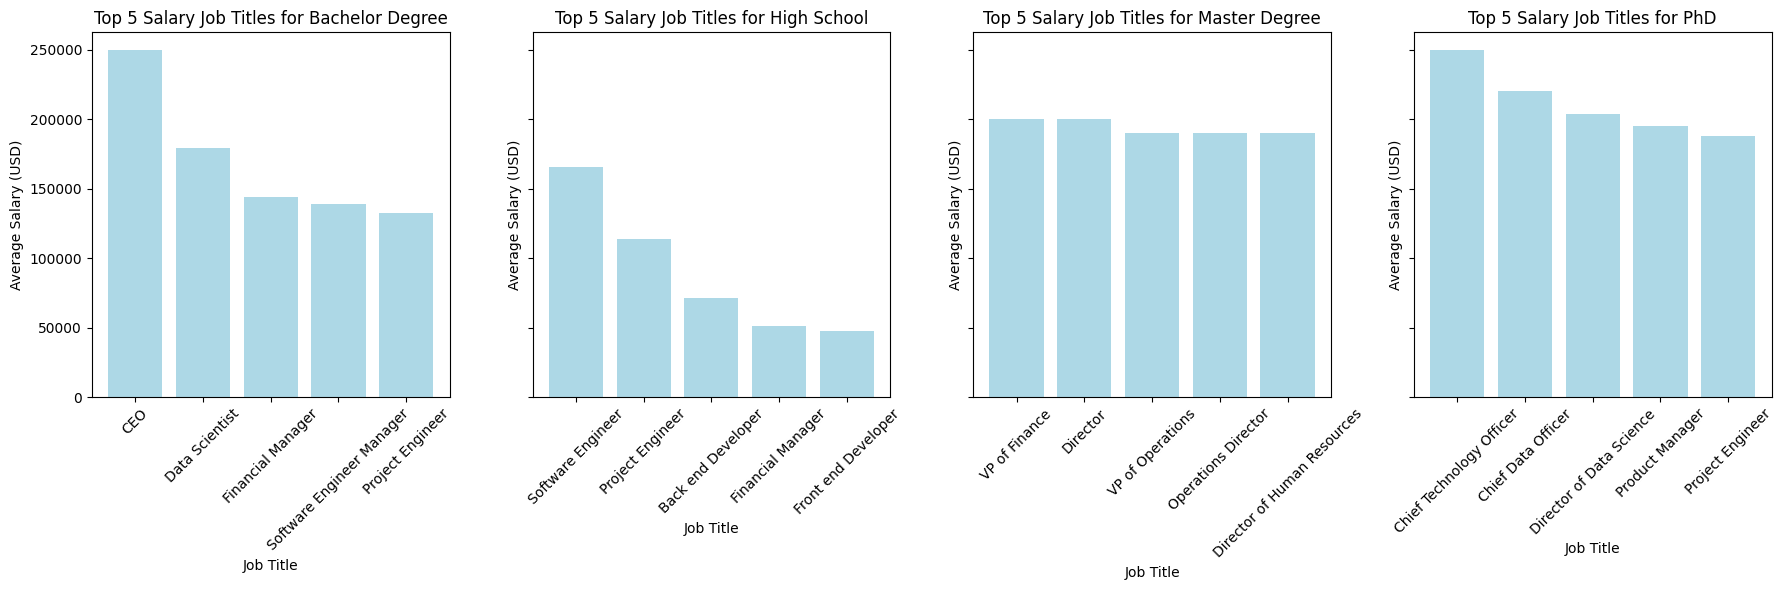

In [ ]:
# Group by 'Education Level' and 'Job Title' and calculate the average salary for each combination
avg_salary_by_job_title_education = salary_df_cleaned.groupby(['Education Level', 'Job Title'])['Salary'].mean()

# Filter out top 5 job titles with the highest salary for each Education Level
top_5_job_titles_per_education = avg_salary_by_job_title_education.groupby('Education Level', group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(5))

# Verify unique education levels after mapping
education_levels = sorted(top_5_job_titles_per_education.index.get_level_values('Education Level').unique(), key=lambda x: ['Bachelor Degree','High School', 'Master Degree', 'PhD'].index(x))

# Create one bar chart for each Education Level
fig, axes = plt.subplots(nrows=1, ncols=len(education_levels), figsize=(18, 6), sharey=True)

# If only one education level, axes is not an array, so we make sure to handle it
if len(education_levels) == 1:
    axes = [axes]

for i, edu_level in enumerate(education_levels):
    # Filter data for the current education level
    data = top_5_job_titles_per_education[edu_level]

    # Plot the bar chart for the current education level
    axes[i].bar(data.index.get_level_values('Job Title'), data.values, color='lightblue')
    axes[i].set_title(f"Top 5 Salary Job Titles for {edu_level}")
    axes[i].set_xlabel("Job Title")
    axes[i].set_ylabel("Average Salary (USD)")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


The analysis reveals a clear trend in salary differences across education levels. **High School** graduates, interestingly, hold high-paying positions like CEO and Data Scientist, with the top roles offering salaries ranging from $132,583 to $250,000, significantly outpacing those with a Bachelor’s degree. For individuals with a **Bachelor's Degree**, the highest-paying job is Software Engineer, followed by Project Engineer and other technical roles. The average salaries for Bachelor's degree holders are relatively lower compared to higher education levels, with Front End Developers and Financial Managers earning around $47,898 to $51,000.  For those with a **Master's Degree**, senior leadership roles such as VP of Finance and Director are highly compensated, with salaries around $190,000 to $200,000. Finally, **PhD** holders, predominantly in high-level positions like Chief Technology Officer and Chief Data Officer, command the highest salaries, with the top roles offering between $195,000 and $250,000, demonstrating that advanced education correlates with higher-paying executive and technical positions.

**2.1.3 Top 5 most popular job titles for each educational level.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-47-22453cbdfb0b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_counts = salary_df_cleaned.groupby(['Education Level', 'Job Title']).size()


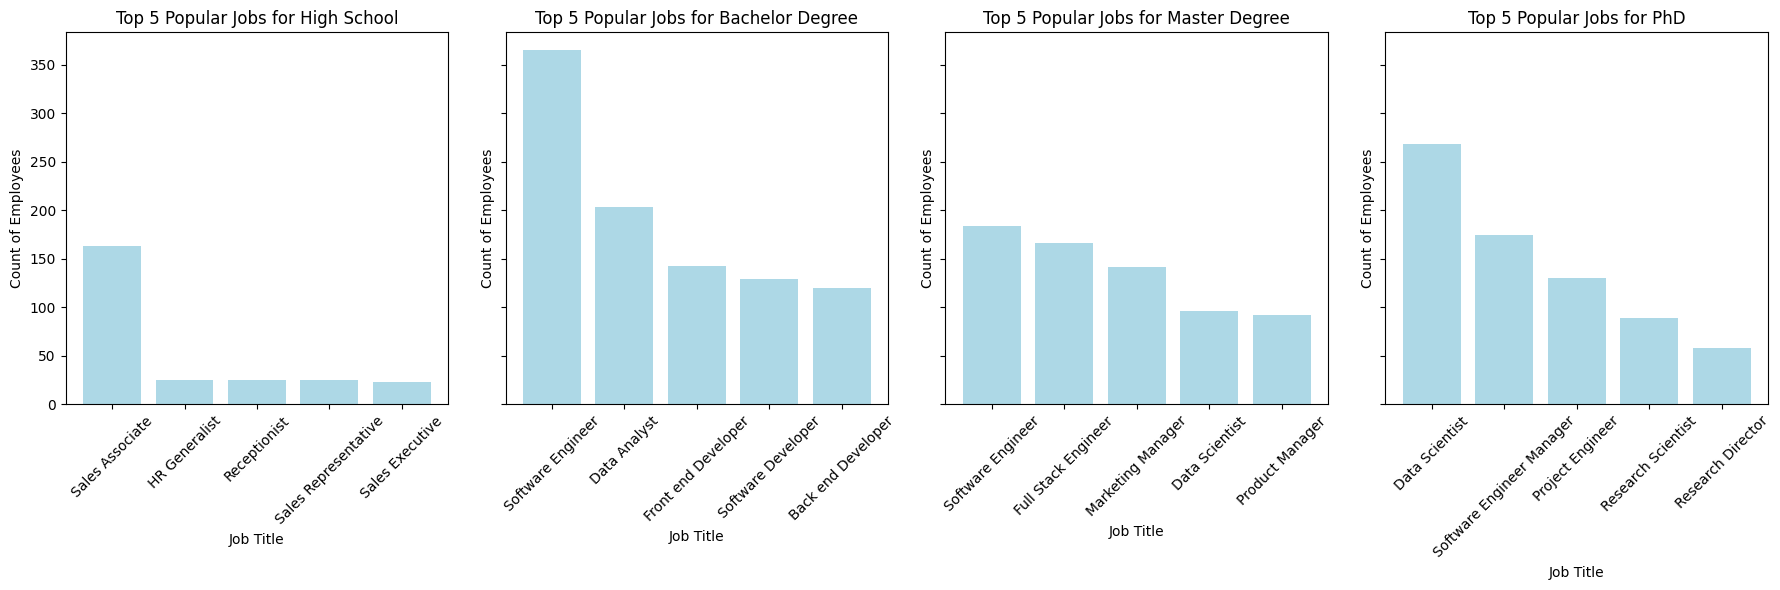

In [ ]:
# Group by 'Education Level' and 'Job Title' and count occurrences
job_counts = salary_df_cleaned.groupby(['Education Level', 'Job Title']).size()

# Find the top 5 most popular jobs for each education level
top_5_jobs_per_education = job_counts.groupby('Education Level', group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(5))

# Extract unique education levels
education_levels = sorted(top_5_job_titles_per_education.index.get_level_values('Education Level').unique(), key=lambda x: ['High School', 'Bachelor Degree', 'Master Degree', 'PhD'].index(x))

# Visualize the data
fig, axes = plt.subplots(nrows=1, ncols=len(education_levels), figsize=(18, 6), sharey=True)

# Ensure axes is always an array for consistent indexing
if len(education_levels) == 1:
    axes = [axes]

for i, edu_level in enumerate(education_levels):
    # Filter data for the current education level
    data = top_5_jobs_per_education.loc[edu_level]

    # Plot the bar chart
    axes[i].bar(data.index.get_level_values('Job Title'), data.values, color='lightblue')
    axes[i].set_title(f"Top 5 Popular Jobs for {edu_level}")
    axes[i].set_xlabel("Job Title")
    axes[i].set_ylabel("Count of Employees")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


The analysis of the top 5 most popular jobs for each education level reveals notable trends that align with both the increasing specialization required for higher education levels and the type of roles typically pursued by individuals with different qualifications.

For individuals with a High School education, the most common jobs are in technical fields such as Software Engineer, Data Analyst, and various developer positions (Front End, Software, and Back End). This suggests that high school graduates, possibly with additional vocational training or technical certifications, are entering the labor market in roles that require specialized technical skills. These positions, especially in software development and data analysis, show how specialized technical expertise can open up high-demand job opportunities even without higher education.

For those with a Bachelor's Degree, sales-related roles such as Sales Associate, Sales Representative, and Sales Executive are the most prevalent. These positions require a mix of communication skills, business knowledge, and interpersonal abilities, which align well with the foundational skills gained during a Bachelor’s education. In addition, roles like HR Generalist and Receptionist reflect the broader range of positions that Bachelor's degree holders tend to fill, particularly in administrative and operational functions, where the focus is on organizational and management skills.

Individuals with a Master's Degree are most commonly found in technical and managerial roles such as Software Engineer, Full Stack Engineer, and Data Scientist. These positions demand advanced knowledge and experience in areas like programming, system design, and data analytics. The presence of roles like Marketing Manager and Product Manager further indicates that Master’s degree holders are also entering leadership positions that combine technical expertise with strategic decision-making responsibilities.

Finally, PhD holders are concentrated in high-level technical, research, and leadership roles such as Data Scientist, Software Engineer Manager, and Research Scientist. These positions reflect the advanced problem-solving, research, and technical leadership skills that are typically developed during PhD programs. PhD graduates are often sought after for their ability to innovate and manage complex projects, which explains their prevalence in positions like Project Engineer and Research Director, where they are responsible for leading teams and advancing research.

In conclusion, the analysis shows that higher educational attainment generally corresponds with more specialized and leadership-oriented roles. High School graduates are more likely to pursue technical positions, Bachelor’s degree holders are drawn to business and administrative roles, Master’s degree holders tend to fill advanced technical and managerial positions, and PhD holders dominate high-level technical, research, and leadership roles. The growing importance of technical expertise, particularly in software development and data science, is evident across all education levels, highlighting the increasing demand for these skills in the modern workforce.

**2.2 Correlation Analysis:**

**2.2.1 Correlation Analysis Between Variables**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-da5dae11cfe6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df_cleaned[column] = label_encoder.fit_transform(salary_df_cleaned[column])
<ipython-input-48-da5dae11cfe6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

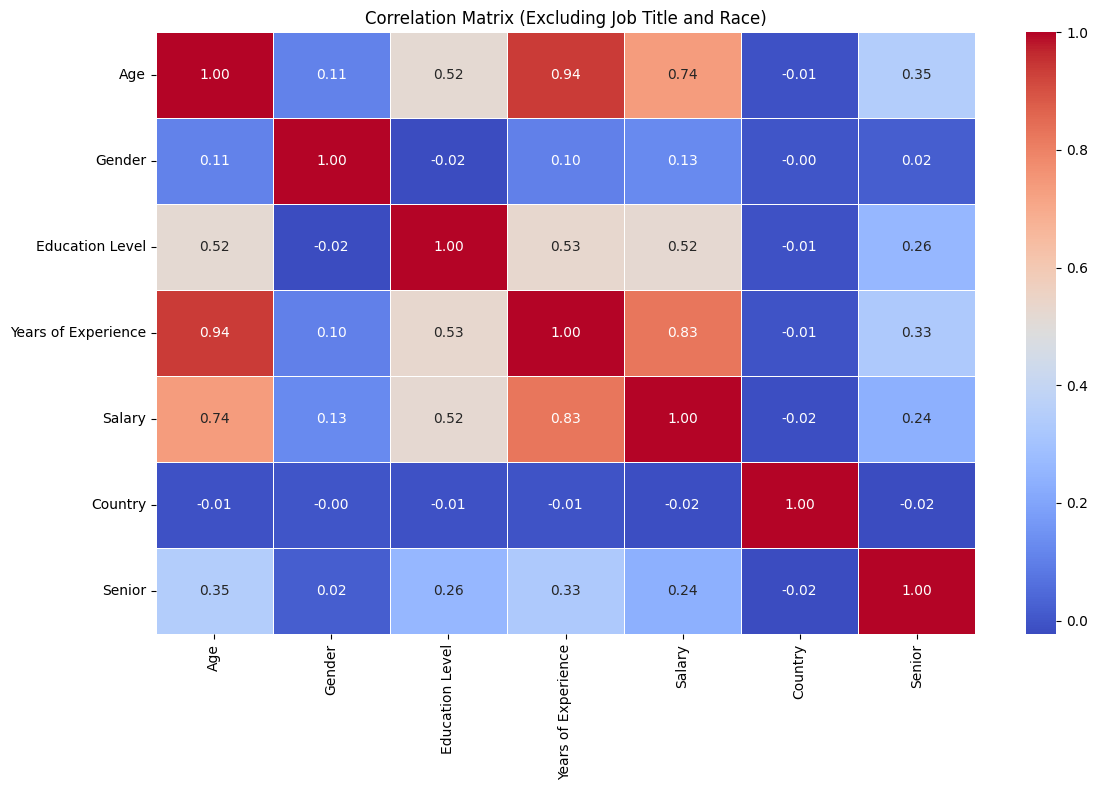

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numeric using label encoding
categorical_columns = ['Gender', 'Education Level', 'Country', 'Senior']
label_encoder = LabelEncoder()

for column in categorical_columns:
    salary_df_cleaned[column] = label_encoder.fit_transform(salary_df_cleaned[column])

# Drop 'Job Title' and 'Race' columns from the dataframe
filtered_df = salary_df_cleaned.drop(columns=['Job Title', 'Race'])

# Calculate the correlation matrix for the remaining variables
corr_matrix = filtered_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix (Excluding Job Title and Race)')

plt.tight_layout()
plt.show()


From the correlation matrix results, we can observe that salary has a correlation coefficient of 0.74 with age, 0.83 with years of experience, and 0.51 with education level. Age has a correlation coefficient of 0.94 with years of experience. Education level has a correlation coefficient of 0.53 with years of experience. This suggests that age is collinear with years of experience. Therefore, logically, it is years of experience, rather than age, that primarily determines salary.

**2.2.3 Visualizing Salary and Years of Experience by Education Level**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-f7546f5ebb2a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df_cleaned['Education Level'] = salary_df_cleaned['Education Level'].replace(education_mapping)


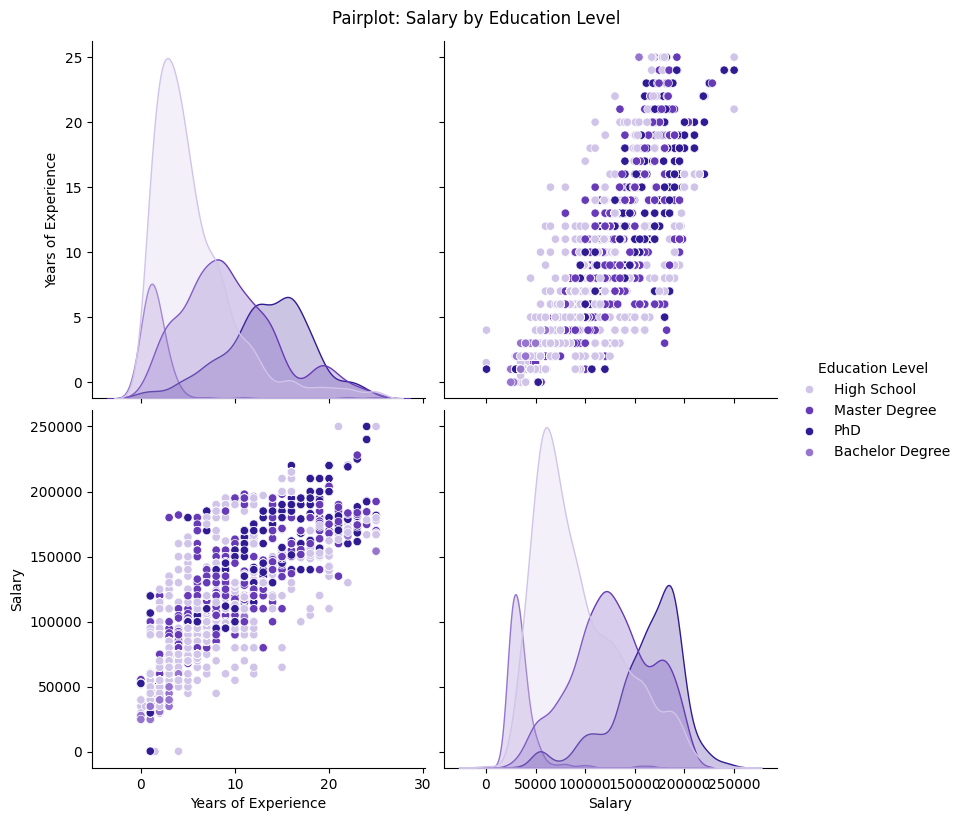

In [ ]:
# Map numerical values to corresponding education level names
education_mapping = {
    0: "High School",
    1: "Bachelor Degree",
    2: "Master Degree",
    3: "PhD"
}

# Replace the numerical values with names
salary_df_cleaned['Education Level'] = salary_df_cleaned['Education Level'].replace(education_mapping)

# Define a custom color palette from light to dark
education_palette = {
    "High School": "#d1c4e9",  # Light lavender
    "Bachelor Degree": "#9575cd",  # Medium purple
    "Master Degree": "#673ab7",  # Deep purple
    "PhD": "#311b92"  # Dark purple
}


sns.pairplot(
    salary_df_cleaned,
    hue="Education Level",
    vars=['Years of Experience', 'Salary'],
    palette=education_palette,
    height=4  # Adjust this value for larger plots (default is 2.5)
)
plt.suptitle('Pairplot: Salary by Education Level', y=1.02)
plt.show()

As education levels increase, so does the number of years of experience. PhD holders generally have the most years of experience, followed by individuals with Master's degrees, High School graduates, and Bachelor's degree holders. The distribution of experience is more concentrated among those with Master's and PhD degrees, while it is broader and more variable for High School and Bachelor's degree holders.

In terms of salary, higher education levels are associated with higher average salaries. PhD holders earn the highest salaries, followed by those with Master's degrees, High School graduates, and Bachelor's degree holders. The salary mean progressively increases from High School to Bachelor's and Master's degrees. The variation in salary is greatest among High School graduates, with a larger standard deviation, while PhDs show moderate salary variation.

**2.2.4 Association Rules within the Dataset**

In [ ]:
# Prepare the dataset to be converted into one-hot encoding
# by keeping it concise
salaryOneHit = salary_df_cleaned.copy()
salaryOneHit.Country = salaryOneHit.Country.replace(0, "Australia")
salaryOneHit.Country = salaryOneHit.Country.replace(1, "Canada")
salaryOneHit.Country = salaryOneHit.Country.replace(2, "China")
salaryOneHit.Country = salaryOneHit.Country.replace(3, "UK")
salaryOneHit.Country = salaryOneHit.Country.replace(4, "USA")
salaryOneHit["Years of Experience"] = salaryOneHit["Years of Experience"].apply(lambda x: "<10 years experience" if x <= 10 else "10+ years experience")
salaryOneHit["Salary"] = salaryOneHit["Salary"].apply(lambda x: "Below-average salary" if x < 114272.010878  else "Above-average salary")
salaryOneHit["Senior"] = salaryOneHit["Senior"].apply(lambda x: "Senior" if x == 1  else "Non-senior")
salaryOneHit["Gender"] = salaryOneHit["Gender"].apply(lambda x: "Male" if x == 1  else "Female")
salaryOneHit["Age"] = salaryOneHit["Age"].apply(lambda x: "-20s" if x < 30 else "30s" if x < 40 else "40s" if x < 50 else "50s+")
salaryOneHit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,30s,Male,High School,Software Engineer,<10 years experience,Below-average salary,UK,White,Non-senior
1,-20s,Female,Master Degree,Data Analyst,<10 years experience,Below-average salary,USA,Hispanic,Non-senior
2,40s,Male,PhD,Manager,10+ years experience,Above-average salary,Canada,White,Senior
3,30s,Female,High School,Sales Associate,<10 years experience,Below-average salary,USA,Hispanic,Non-senior
4,50s+,Male,Master Degree,Director,10+ years experience,Above-average salary,USA,Asian,Non-senior
...,...,...,...,...,...,...,...,...,...
6678,30s,Male,High School,Sales Representative,<10 years experience,Below-average salary,Canada,Asian,Non-senior
6679,40s,Female,PhD,Director of Marketing,10+ years experience,Above-average salary,UK,Mixed,Non-senior
6680,30s,Male,Bachelor Degree,Sales Associate,<10 years experience,Below-average salary,Australia,Australian,Non-senior
6681,30s,Female,High School,Financial Manager,<10 years experience,Below-average salary,China,Chinese,Non-senior


In [ ]:
# Import libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Convert transaction data to a format suitable for association rule mining (One-hot encoding)
basket = salaryOneHit
basket_set = pd.get_dummies(basket.apply(lambda x: pd.Series(x.dropna().values), axis=1).stack()).groupby(level=0).sum()

# Set minimum support and confidence
min_support = 0.3
min_confidence = 0.85

# Perform Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_set, min_support=min_support, use_colnames=True)

# Generate association rules with the given confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence, num_itemsets=len(salaryOneHit))

# Show the resulting rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                          antecedents  \
0                                              (-20s)   
1                                              (-20s)   
2                                              (-20s)   
3                              (10+ years experience)   
4                              (Below-average salary)   
5                                       (High School)   
6                              (<10 years experience)   
7                              (Below-average salary)   
8                                       (High School)   
9                        (<10 years experience, -20s)   
10                       (Below-average salary, -20s)   
11                                             (-20s)   
12                       (<10 years experience, -20s)   
13                                 (-20s, Non-senior)   
14                                             (-20s)   
15                                 (-20s, Non-senior)   
16                       (Below

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Some of the rules with the highest confidence tended to correlate having less than 10 years experience with having below average salary. For instance, a rule that below average salary & non-senior implied less than 10 years experience had a confidence of about 0.992, and another rule that directly stated that below-average salary implies less than 10 years experience with a confidence of 0.985. The highest support (0.621) was for the rule that having less than 10 years of experience implies being non-senior, which also logically makes sense given that senior roles are typically associated with candidates who have more experience in the job field.

No association rules seemed to suggest any correlation between race or country and any other category. It should also be noted that "high school" is the only education level that any association rules were found for and 20s or younger is the only age group that any association rules were found for, both generally implying that it is correlated with having less than 10 years of experience.

Exactly two rules proved to have a confidence of 100% (1.0):
- Below-average salary and person in their 20s or younger implies less than 10 years experience
- Below-average salary, person in their 20s or younger, and non-senior implies less than 10 years experience

This logically makes sense even from the perspective that a person in their 20s is likely too young to have that much experience, though the confidence for 20s or younger implying less than 10 years experience is only 0.999.

The confidence value was raised to 0.85 from the default 0.7 for a couple reasons. One of the reasons was that a large number of rules were generated, and the other being that many of these rules provided contradictions. For instance, two rules found were that a person being Female implies that they are non-senior (Confidence: 0.849, Support: 0.387), but also that being Male implies that they are non-senior (Confidence: 0.835, Support: 0.454). This would effectively make every individual in the dataset implied to be non-senior, which would not make sense are there are seniors in the dataset. Raising the minimum confidence helped to prevent these paradoxes and show only the most confident associations that were detected.